# Deep Learning Intro


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import sys

import keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
gpu = len(tf.config.list_physical_devices("GPU")) > 0
if gpu:
    print("GPU is", "available" if gpu else "NOT AVAILABLE")
    print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))
    print(
        "Physical GPUs: ",
        tf.config.list_physical_devices("GPU"),
        "Logical GPUs: ",
        tf.config.list_logical_devices("GPU"),
    )
print(
    "Physical CPUs: ", tf.config.list_physical_devices("CPU"), "Logical CPUs: ", tf.config.list_logical_devices("CPU")
)
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
tf.debugging.set_log_device_placement(True)

Python Platform: Linux-6.6.12-linuxkit-aarch64-with-glibc2.35
Tensor Flow Version: 2.14.0
Physical CPUs:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')] Logical CPUs:  [LogicalDevice(name='/device:CPU:0', device_type='CPU')]
Keras Version: 2.14.0

Python 3.11.6 | packaged by conda-forge | (main, Oct  3 2023, 11:57:02) [GCC 12.3.0]
Pandas 2.1.1
Scikit-Learn 1.3.1
SciPy 1.11.3


## Shallow and Deep Networks


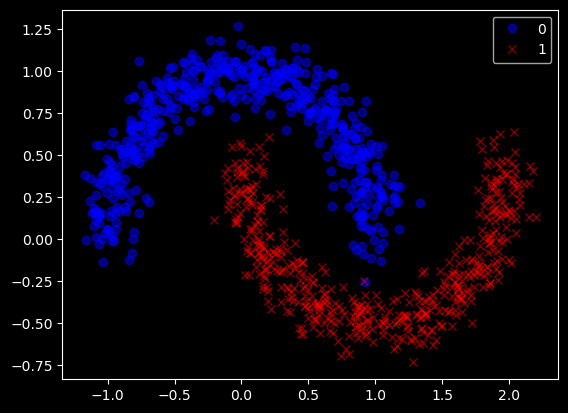

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y == 0, 0], X[y == 0, 1], "ob", alpha=0.5)
plt.plot(X[y == 1, 0], X[y == 1, 1], "xr", alpha=0.5)
plt.legend(["0", "1"])

In [4]:
X.shape

(1000, 2)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers.legacy import Adam, SGD
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

### Shallow Model


In [8]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))
model.compile(Adam(learning_rate=0.05), "binary_crossentropy", metrics=["accuracy"])

In [9]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [10]:
results = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 8ms/step - loss: 0.3171 - accuracy: 0.8467


In [11]:
results

[0.3171404302120209, 0.846666693687439]

In [12]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.847


 94/319 [=======>......................] - ETA: 0s

319/319 [==============================] - 1s 3ms/step


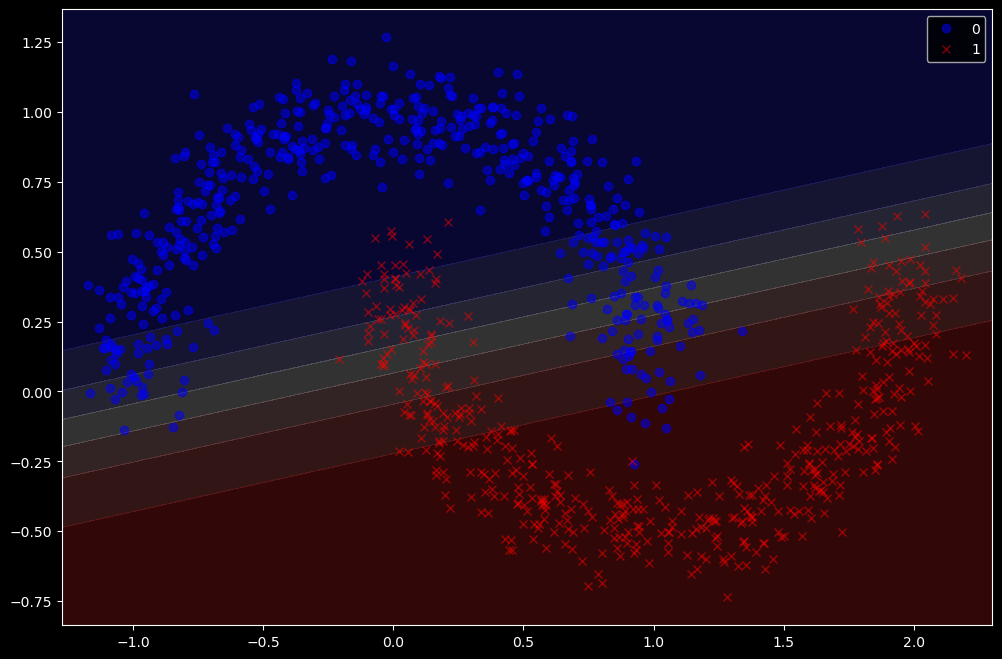

In [13]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)

    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]

    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap="bwr", alpha=0.2)
    plt.plot(X[y == 0, 0], X[y == 0, 1], "ob", alpha=0.5)
    plt.plot(X[y == 1, 0], X[y == 1, 1], "xr", alpha=0.5)
    plt.legend(["0", "1"])


plot_decision_boundary(model, X, y)

### Deep model


In [14]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation="tanh"))
model.add(Dense(2, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))
model.compile(Adam(learning_rate=0.05), "binary_crossentropy", metrics=["accuracy"])

In [15]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [16]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 6ms/step - loss: 0.0085 - accuracy: 0.9967


[0.00853752251714468, 0.996666669845581]

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_test_pred = np.argmax(model.predict(X_test), axis=1)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

10/10 [==============================] - 0s 2ms/step
The Accuracy score on the Train set is:	0.519
The Accuracy score on the Test set is:	0.457


319/319 [==============================] - 2s 5ms/step


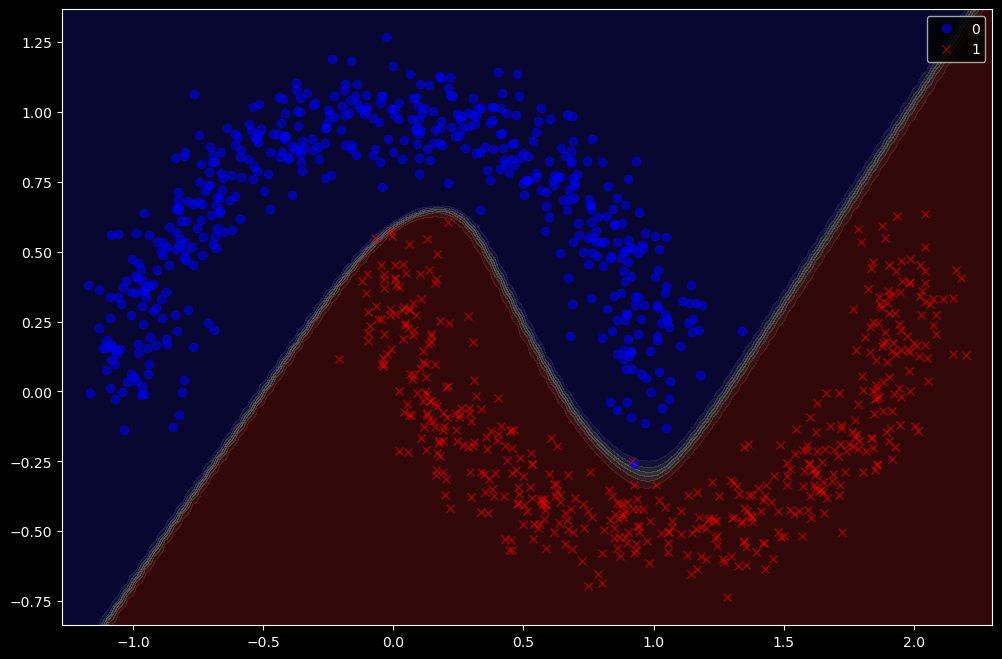

In [19]:
plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset


In [20]:
df = pd.read_csv("../data/iris.csv")

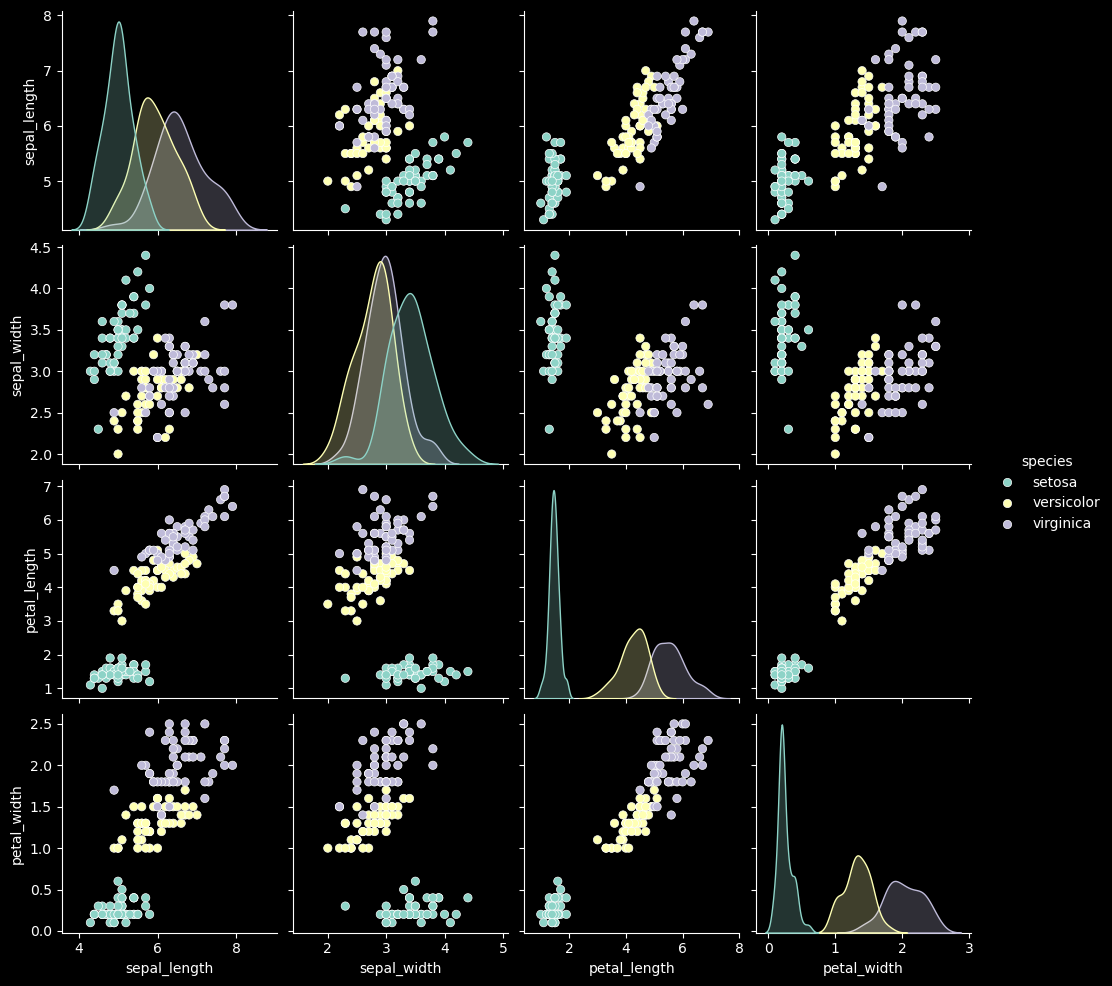

In [21]:
import seaborn as sns

sns.pairplot(df, hue="species")

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
X = df.drop("species", axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
target_names = df["species"].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [25]:
target_dict = {n: i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [26]:
y = df["species"].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [27]:
from keras.utils import to_categorical

In [28]:
y_cat = to_categorical(y)

In [29]:
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat, test_size=0.2)

In [31]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation="softmax"))
model.compile(Adam(learning_rate=0.1), loss="categorical_crossentropy", metrics=["accuracy"])

In [32]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1, verbose=0)

In [33]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 91ms/step


In [34]:
y_pred[:5]

array([[1.3259905e-03, 3.9746198e-01, 6.0121202e-01],
       [2.9091595e-04, 2.0936643e-01, 7.9034263e-01],
       [9.7436935e-01, 2.5501419e-02, 1.2917360e-04],
       [2.0696593e-02, 6.7515969e-01, 3.0414379e-01],
       [1.6927743e-02, 6.1349255e-01, 3.6957973e-01]], dtype=float32)

In [35]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [38]:
confusion_matrix(y_test_class, y_pred_class)

array([[10,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 13]])

## Exercise 1


The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature

- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?


In [39]:
df_dm = pd.read_csv("../data/diabetes.csv")

In [40]:
df_dm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


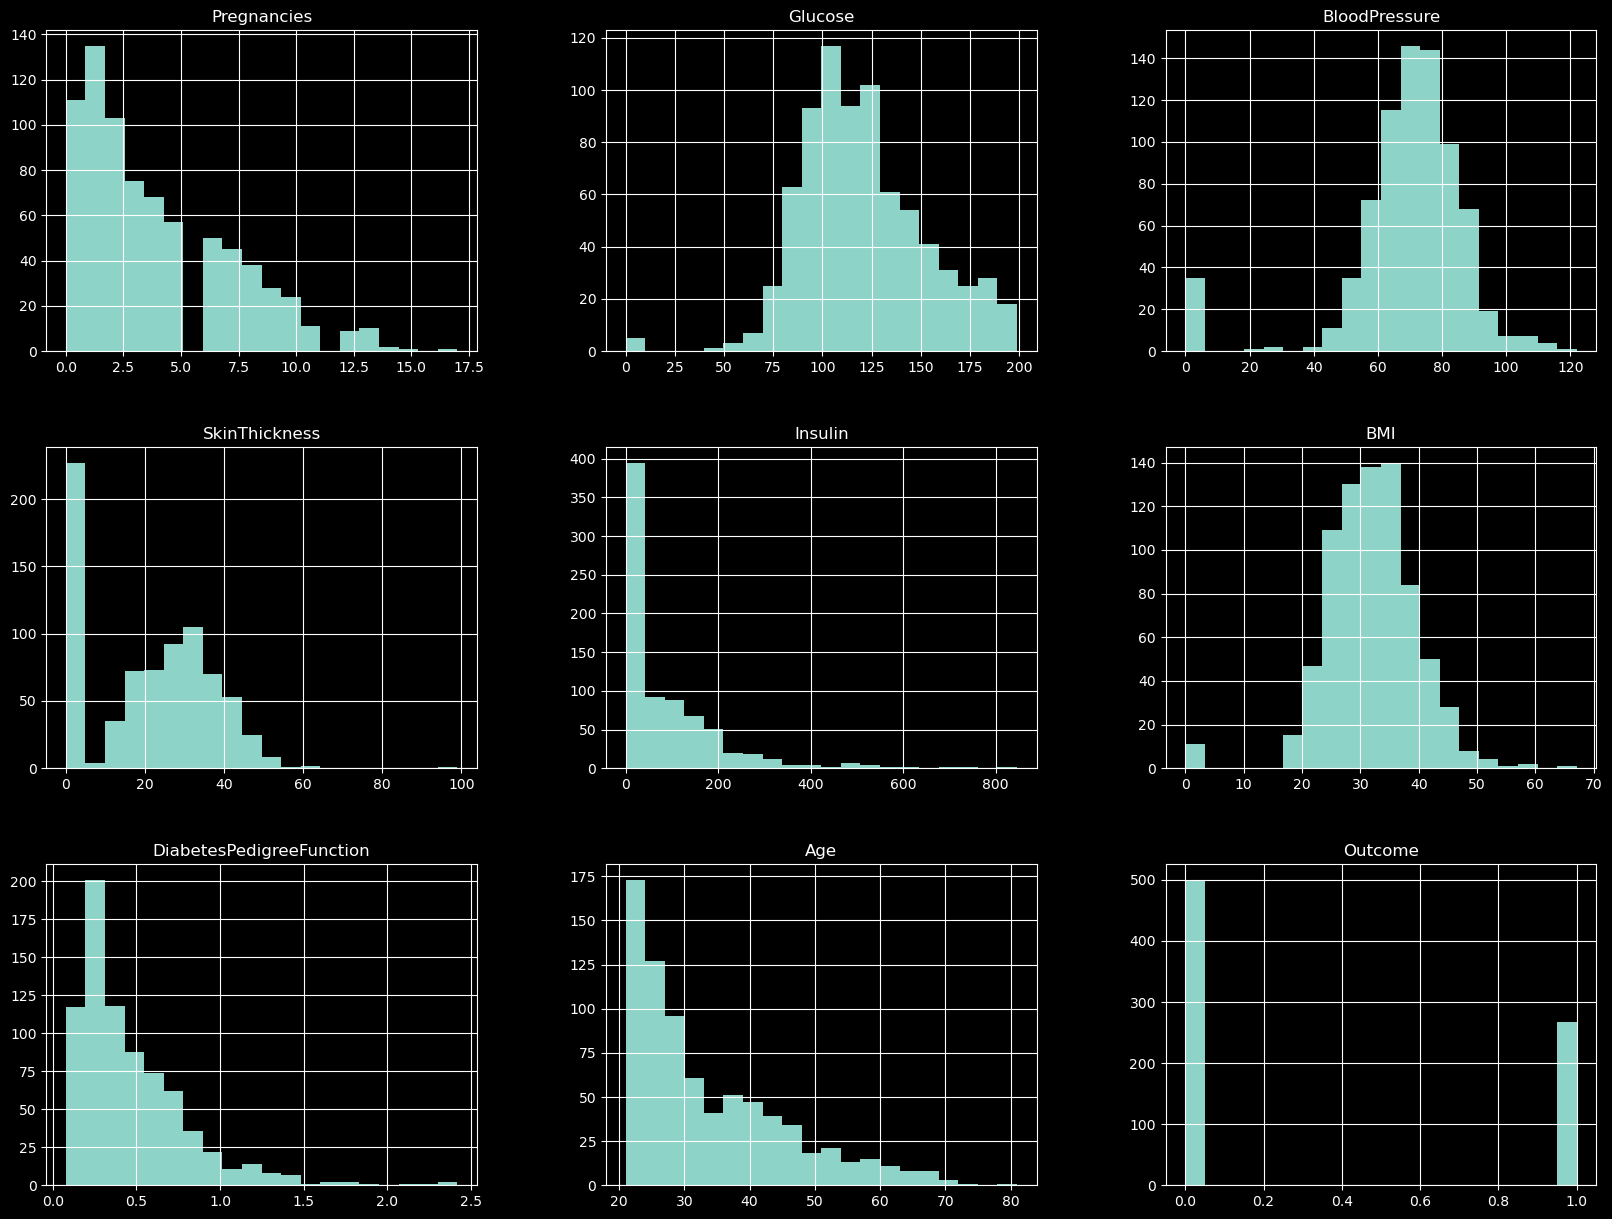

In [41]:
_ = df_dm.hist(bins=20, figsize=(20, 15))

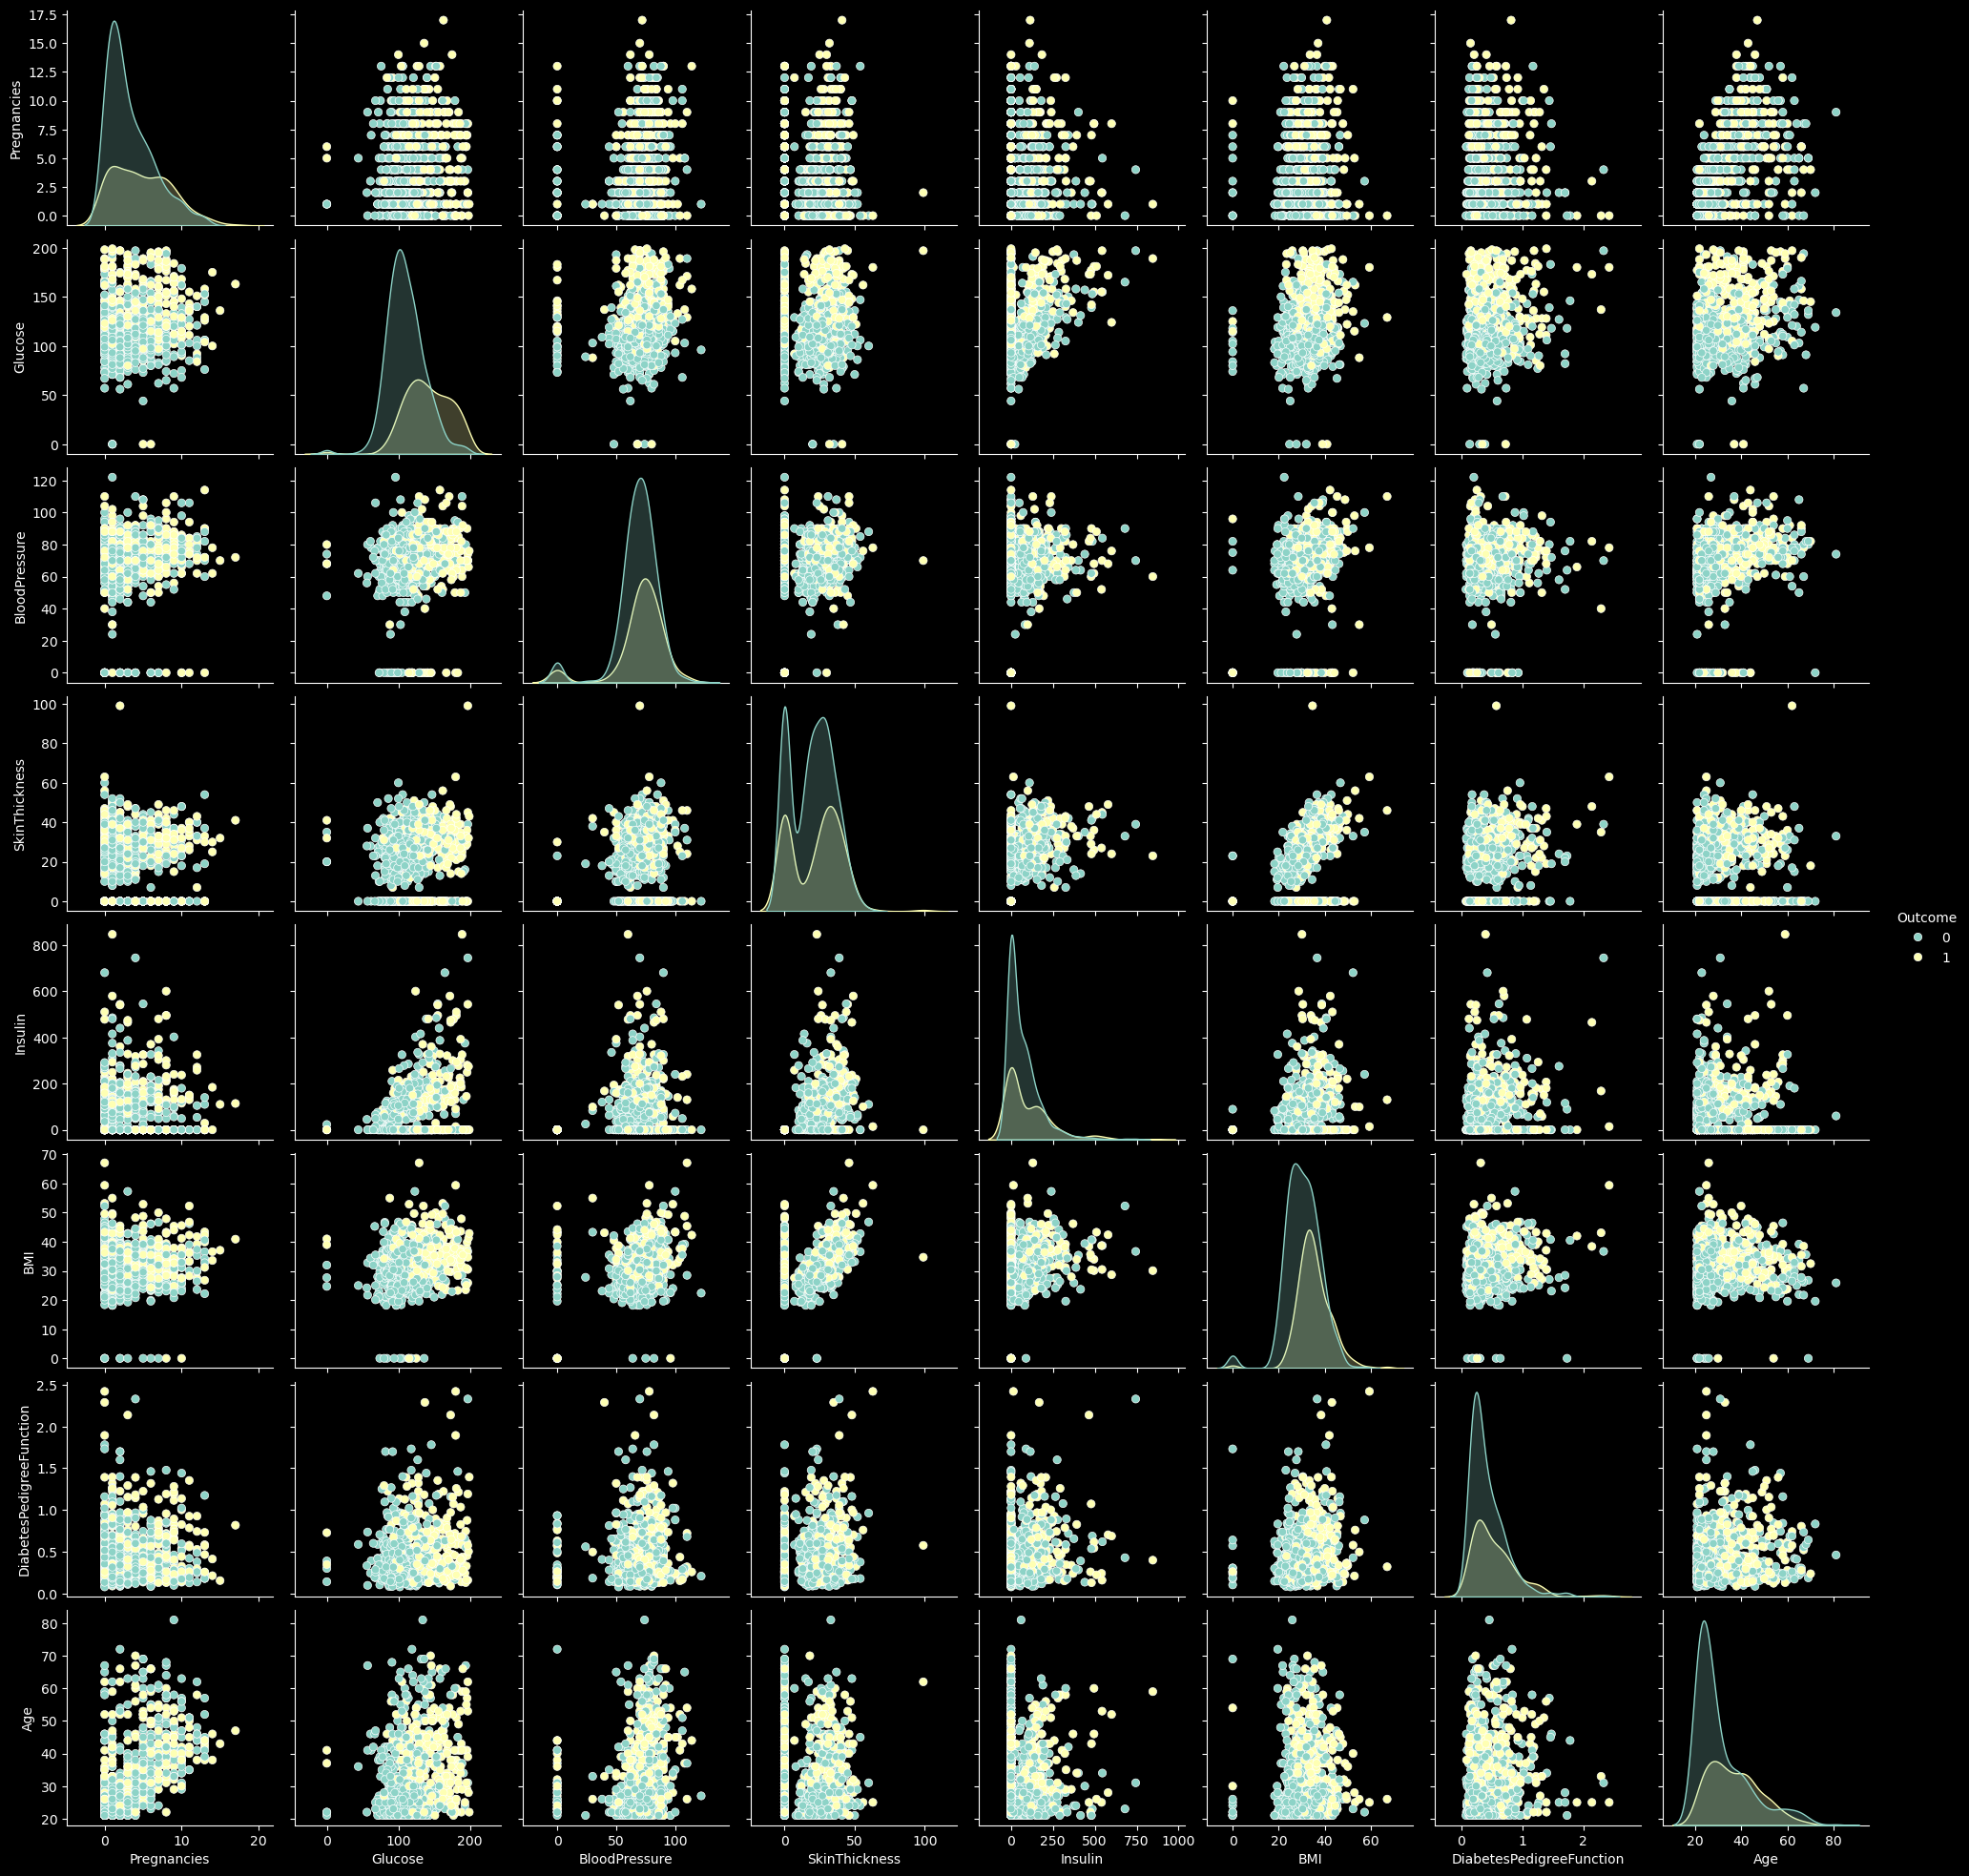

In [42]:
sns.pairplot(df_dm, hue="Outcome")

<Axes: >

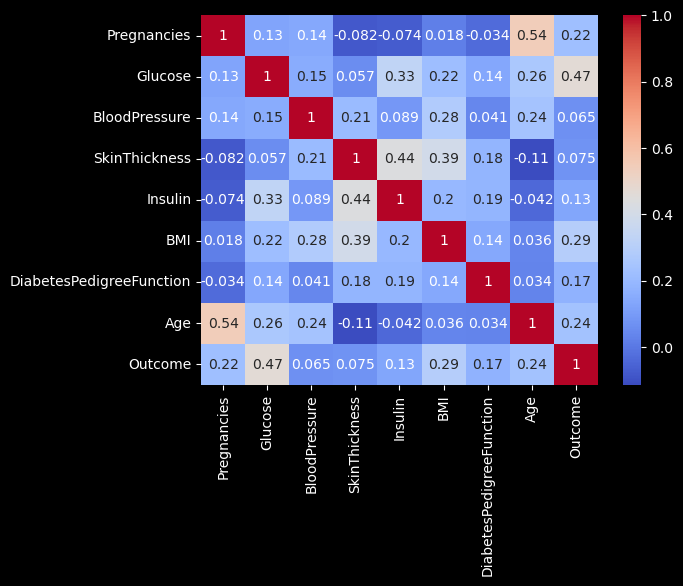

In [43]:
sns.heatmap(df_dm.corr(), annot=True, cmap="coolwarm")

In [44]:
df_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
df_dm.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
X_dm = (df_dm - df_dm.mean()) / df_dm.std()
X_dm.drop("Outcome", axis=1, inplace=True)
X_dm.head()
X_dm.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.938894e-17,-1.156482e-17,1.272131e-17,9.367507e-17,-1.676899e-17,2.613650e-16,2.359224e-16,2.104798e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.141108e+00,-3.781190e+00,-3.570271e+00,-1.287373e+00,-6.924393e-01,-4.057829e+00,-1.188778e+00,-1.040871e+00
25%,-8.443348e-01,-6.847901e-01,-3.670975e-01,-1.287373e+00,-6.924393e-01,-5.951906e-01,-6.885198e-01,-7.857741e-01
50%,-2.507887e-01,-1.218083e-01,1.495433e-01,1.544326e-01,-4.277835e-01,9.413653e-04,-2.999328e-01,-3.606124e-01
75%,6.395305e-01,6.053764e-01,5.628560e-01,7.186174e-01,4.117396e-01,5.843897e-01,4.659233e-01,6.597757e-01
max,3.904034e+00,2.442886e+00,2.732747e+00,4.918660e+00,6.648507e+00,4.452906e+00,5.879733e+00,4.061069e+00


In [47]:
X_dm.shape

(768, 8)

In [48]:
from keras.utils import to_categorical

In [49]:
Y_dm_raw = df_dm["Outcome"].values
Y_dm = to_categorical(Y_dm_raw)

In [50]:
Y_dm.shape

(768, 2)

## Exercise 2


Build a fully connected NN model that predicts diabetes. Follow these steps:

1. Split your data in a train/test with a test size of 20% and a `random_state = 22`

- define a sequential model with at least one inner layer. You will have to make choices for the following things:
  - what is the size of the input?
  - how many nodes will you use in each layer?
  - what is the size of the output?
  - what activation functions will you use in the inner layers?
  - what activation function will you use at output?
  - what loss function will you use?
  - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report


In [51]:
df_dm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
df_dm.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [53]:
df_dm.isnull().values.any()

False

In [54]:
df_dm.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_dm, Y_dm, test_size=0.2, random_state=22)

model = Sequential()
model.add(Dense(32, input_shape=(8,), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(Adam(learning_rate=0.05), "categorical_crossentropy", metrics=["accuracy"])

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                288       
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1410 (5.51 KB)
Trainable params: 1410 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
model.fit(X_train, y_train, epochs=20, verbose=0, validation_split=0.1)

In [58]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [59]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [60]:
accuracy_score(y_test_class, y_pred_class)

0.7142857142857143

In [61]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       100
           1       0.69      0.33      0.45        54

    accuracy                           0.71       154
   macro avg       0.71      0.63      0.63       154
weighted avg       0.71      0.71      0.68       154



In [62]:
confusion_matrix(y_test_class, y_pred_class)

array([[92,  8],
       [36, 18]])

## Exercise 3

Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

for mod in [RandomForestClassifier(), SVC(), GaussianNB()]:
    mod.fit(X_train, y_train[:, 1])
    y_pred = mod.predict(X_test)
    print("=" * 80)
    print(mod)
    print("-" * 80)
    print("Accuracy score: {:0.3}".format(accuracy_score(y_test_class, y_pred)))
    print("Confusion matrix:\n{}".format(confusion_matrix(y_test_class, y_pred)))
    print()

RandomForestClassifier()
--------------------------------------------------------------------------------
Accuracy score: 0.74
Confusion matrix:
[[91  9]
 [31 23]]

SVC()
--------------------------------------------------------------------------------
Accuracy score: 0.721
Confusion matrix:
[[89 11]
 [32 22]]

GaussianNB()
--------------------------------------------------------------------------------
Accuracy score: 0.708
Confusion matrix:
[[87 13]
 [32 22]]



## Exercise 4

[Tensorflow playground](http://playground.tensorflow.org/) is a web based neural network demo. It is really useful to develop an intuition about what happens when you change architecture, activation function or other parameters. Try playing with it for a few minutes. You don't need do understand the meaning of every knob and button in the page, just get a sense for what happens if you change something. In the next chapter we'll explore these things in more detail.
